# Performance of data sources

This section aims to determine if there are differences in how each data source, i.e., **smartphone (sp)**, **smartwatch (sw)** and **fused** datasets, performs in the selected models for HAR.

The results of this notebook are summarized in the Section IV-B of the paper.

In [1]:
import os

from itables import show
from lib.analysis.data_loading import load_reports, load_best_significant
from lib.analysis.model import Model, Source, ActivityMetric, ModelMetric, TargetFilter, obtain_best_items
from lib.analysis.statistical_tests import statistical_comparison
from lib.analysis.visualization import plot_visual_comparison


MODELS = [Model.MLP, Model.CNN, Model.LSTM, Model.CNN_LSTM]
SOURCES = [Source.SP, Source.SW, Source.FUSED]
SIGNIFICANCE_FILE = os.path.join('01_DATA', '04_SIGNIFICANCE', 'best_sources.csv')
RESULTS_DIR = os.path.join('02_RESULTS', '02_DATA-SOURCES', '{0}')

reports = load_reports()

## Overall performance

Regarding the accuracy of the models (table below), the **smartwatch** dataset always presents the best performance with few amounts of data (i.e., $n \in [3, 4]$), while the **fused** dataset is the best with high amounts of data across all models. When comparing **smartphone** and **smartwatch** in the highest amounts of data, the **smartphone** is superior in the MLP models, while the **smartwatch** is better in the LSTM models, but no significant differences are appreciated in the CNN and CNN-LSTM models.

The post-hoc tests can be found in the next table.

In [2]:
datasource_overlall_tests, datasource_overall_posthoc = statistical_comparison(
    reports,
    (TargetFilter.MODEL, ModelMetric.ACCURACY), 
    MODELS, 
    SOURCES
)
datasource_overlall_tests

mlp                                   cnn                         \
       sp     sw  fused     H(2) p-value     sp     sw  fused     H(2)   
n                                                                        
1   0.202  0.528  0.242  147.696   0.000  0.390  0.678  0.511  111.888   
2   0.491  0.679  0.491   71.194   0.000  0.659  0.755  0.716   33.542   
3   0.609  0.710  0.624   36.563   0.000  0.719  0.788  0.787   36.940   
4   0.700  0.736  0.729   10.771   0.005  0.776  0.807  0.821   16.354   
5   0.743  0.766  0.759    2.758   0.252  0.811  0.829  0.838   15.710   
6   0.739  0.777  0.788    8.468   0.014  0.798  0.834  0.849   26.631   
7   0.782  0.778  0.795    3.121   0.210  0.837  0.838  0.852   13.777   
8   0.789  0.795  0.802    4.698   0.095  0.836  0.840  0.858   15.600   
9   0.813  0.803  0.819   16.174   0.000  0.843  0.857  0.872   18.848   
10  0.819  0.807  0.840   24.966   0.000  0.854  0.858  0.875   17.747   
11  0.825  0.803  0.840   32.831   0.000  0.856  0.854  0.874   21.060   
12  0.831  0.803  0.847   48.143   0.000  0.855  0.858  0.877   19.258   
13  0.837  0.810  0.849   64.810   0.000  0.861  0.859  0.887   34.245   
14  0.841  0.815  0.855   62.088   0.000  0.869  0.863  0.889   36.509   
15  0.842  0.815  0.861   93.565   0.000  0.869  0.864  0.889   32.564   
16  0.841  0.814  0.864   88.822   0.000  0.870  0.868  0.890   31.497   
17  0.851  0.816  0.867  106.636   0.000  0.877  0.867  0.895   36.744   
18  0.846  0.815  0.867  107.590   0.000  0.877  0.867  0.896   40.226   
19  0.856  0.821  0.872  123.329   0.000  0.873  0.869  0.896   40.944   
20  0.852  0.817  0.876  136.192   0.000  0.880  0.872  0.898   51.361   
21  0.854  0.824  0.873  121.986   0.000  0.884  0.871  0.897   46.619   
22  0.861  0.822  0.879  144.736   0.000  0.886  0.874  0.902   50.409   

             lstm                                cnn-lstm                \
   p-value     sp     sw  fused     H(2) p-value       sp     sw  fused   
n                                                                         
1    0.000  0.283  0.650  0.437  119.849   0.000    0.426  0.624  0.475   
2    0.000  0.583  0.728  0.661   47.641   0.000    0.682  0.739  0.654   
3    0.000  0.665  0.776  0.739   55.392   0.000    0.710  0.774  0.767   
4    0.000  0.694  0.791  0.792   45.746   0.000    0.759  0.801  0.799   
5    0.000  0.753  0.812  0.796   42.896   0.000    0.800  0.816  0.830   
6    0.000  0.758  0.829  0.812   61.456   0.000    0.793  0.823  0.839   
7    0.001  0.771  0.831  0.821   56.416   0.000    0.819  0.823  0.847   
8    0.000  0.786  0.842  0.832   47.311   0.000    0.821  0.833  0.852   
9    0.000  0.813  0.846  0.849   22.774   0.000    0.823  0.852  0.869   
10   0.000  0.826  0.851  0.860   24.270   0.000    0.838  0.849  0.874   
11   0.000  0.826  0.850  0.861   22.877   0.000    0.838  0.849  0.870   
12   0.000  0.830  0.852  0.866   24.382   0.000    0.835  0.854  0.883   
13   0.000  0.846  0.856  0.867   13.828   0.001    0.851  0.856  0.888   
14   0.000  0.848  0.861  0.875   22.951   0.000    0.854  0.856  0.886   
15   0.000  0.850  0.863  0.875   16.633   0.000    0.852  0.858  0.890   
16   0.000  0.850  0.866  0.882   33.638   0.000    0.853  0.860  0.894   
17   0.000  0.855  0.867  0.878   14.331   0.001    0.856  0.861  0.894   
18   0.000  0.854  0.869  0.879   17.394   0.000    0.858  0.864  0.894   
19   0.000  0.855  0.870  0.884   20.879   0.000    0.859  0.868  0.896   
20   0.000  0.864  0.872  0.886   32.094   0.000    0.859  0.866  0.897   
21   0.000  0.864  0.871  0.885   15.898   0.000    0.863  0.867  0.900   
22   0.000  0.865  0.875  0.889   27.551   0.000    0.868  0.869  0.901   

                    
      H(2) p-value  
n                   
1   67.193   0.000  
2   20.235   0.000  
3   15.792   0.000  
4    9.945   0.007  
5   14.262   0.001  
6   24.431   0.000  
7   16.876   0.000  
8   26.122   0.000  
9   36.807   0.000  
10  35.307   0.000  
11  32

In [3]:
show(datasource_overall_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


## Activitiy-wise performance

Next, we focus on how each data source affects the performance of individual activities with each selected model.

### `SEATED`

Results from the table below shows that the **smartwatch**-trained models obtain the best scores for the `SEATED` activity with any amount of data and across all the models. 

In the case of the CNN and CNN-LSTM models in $n \geq 10$, the **fused**-trained models also achieve the best results, with no significant differences with the **smartwatch**-trained models. Therefore, the **smartphone**-trained models achieve the worst results in these models.

Regarding the MLP and LSTM models, when trained with **smartphone** and **fused** data their performance is significantly worse than when trained with **smartwatch** data. Between the **smartphone**- and **fused**-trained models, no significant differences exist in the MLP model with high amounts of data, although differences are observed in the LSTM model in favour of the **fused**-trained models.

In [4]:
datasource_seated_tests, datasource_seated_posthoc = statistical_comparison(
    reports,
    (TargetFilter.SEATED, ActivityMetric.F1),
    MODELS, 
    SOURCES
)
datasource_seated_tests

mlp                                   cnn                         \
       sp     sw  fused     H(2) p-value     sp     sw  fused     H(2)   
n                                                                        
1   0.065  0.397  0.116   84.149     0.0  0.000  0.772  0.388  216.958   
2   0.210  0.706  0.456  121.818     0.0  0.273  0.830  0.716  204.815   
3   0.245  0.805  0.543  185.279     0.0  0.593  0.849  0.800  163.509   
4   0.498  0.840  0.673  161.477     0.0  0.733  0.864  0.823  110.338   
5   0.660  0.841  0.685  143.959     0.0  0.783  0.868  0.839   85.974   
6   0.645  0.850  0.720  152.244     0.0  0.774  0.869  0.839  104.495   
7   0.727  0.849  0.702  129.278     0.0  0.794  0.866  0.854   68.601   
8   0.738  0.868  0.717  164.616     0.0  0.810  0.873  0.861   66.231   
9   0.778  0.871  0.793  117.282     0.0  0.833  0.880  0.861   54.662   
10  0.767  0.872  0.787  108.284     0.0  0.830  0.877  0.872   58.546   
11  0.780  0.870  0.798  103.231     0.0  0.827  0.878  0.867   52.735   
12  0.787  0.876  0.808  109.682     0.0  0.833  0.880  0.876   48.220   
13  0.807  0.877  0.816   81.070     0.0  0.831  0.884  0.871   60.920   
14  0.802  0.877  0.813   91.533     0.0  0.842  0.885  0.877   45.794   
15  0.801  0.873  0.835   78.908     0.0  0.837  0.882  0.872   42.675   
16  0.809  0.875  0.841   72.361     0.0  0.847  0.885  0.876   36.096   
17  0.807  0.881  0.833   70.534     0.0  0.848  0.880  0.877   38.414   
18  0.807  0.882  0.838   76.805     0.0  0.842  0.885  0.875   39.895   
19  0.812  0.880  0.846   67.328     0.0  0.842  0.889  0.875   51.272   
20  0.813  0.885  0.842   69.846     0.0  0.851  0.884  0.877   29.107   
21  0.814  0.875  0.844   57.710     0.0  0.854  0.881  0.875   27.843   
22  0.826  0.879  0.845   59.162     0.0  0.850  0.887  0.875   34.946   

             lstm                                cnn-lstm                \
   p-value     sp     sw  fused     H(2) p-value       sp     sw  fused   
n                                                                         
1      0.0  0.083  0.749  0.316  258.576     0.0    0.084  0.644  0.136   
2      0.0  0.176  0.823  0.650  248.303     0.0    0.737  0.826  0.705   
3      0.0  0.431  0.844  0.741  201.328     0.0    0.788  0.850  0.816   
4      0.0  0.587  0.851  0.800  176.345     0.0    0.800  0.858  0.827   
5      0.0  0.653  0.856  0.800  148.075     0.0    0.812  0.858  0.853   
6      0.0  0.669  0.857  0.800  186.511     0.0    0.797  0.875  0.849   
7      0.0  0.735  0.862  0.828  138.187     0.0    0.821  0.872  0.868   
8      0.0  0.758  0.867  0.833  121.404     0.0    0.811  0.877  0.870   
9      0.0  0.797  0.870  0.845   68.948     0.0    0.836  0.879  0.870   
10     0.0  0.794  0.871  0.844   92.679     0.0    0.833  0.881  0.875   
11     0.0  0.799  0.866  0.844   79.081     0.0    0.830  0.878  0.865   
12     0.0  0.811  0.876  0.862   81.305     0.0    0.833  0.882  0.875   
13     0.0  0.806  0.877  0.847   84.146     0.0    0.831  0.878  0.874   
14     0.0  0.828  0.872  0.863   49.187     0.0    0.828  0.879  0.874   
15     0.0  0.830  0.876  0.858   52.279     0.0    0.833  0.882  0.880   
16     0.0  0.823  0.887  0.857   71.288     0.0    0.843  0.886  0.880   
17     0.0  0.830  0.876  0.865   53.088     0.0    0.836  0.881  0.880   
18     0.0  0.837  0.886  0.861   60.194     0.0    0.843  0.882  0.880   
19     0.0  0.829  0.878  0.865   52.793     0.0    0.837  0.881  0.885   
20     0.0  0.830  0.883  0.868   59.387     0.0    0.844  0.884  0.883   
21     0.0  0.842  0.886  0.867   41.392     0.0    0.837  0.883  0.885   
22     0.0  0.851  0.887  0.867   44.372     0.0    0.842  0.883  0.885   

                    
      H(2) p-value  
n                   
1   58.067     0.0  
2   63.866     0.0  
3   35.338     0.0  
4   42.377     0.0  
5   42.617     0.0  
6   78.750     0.0  
7   42.119     0.0  
8   53.550     0.0  
9   45.063     0.0  
10  51.054     0.0  
11  42

In [5]:
show(datasource_seated_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


### `STANDING_UP`

The table below shows a similar pattern across all models, where the **smartwatch**-trained models produce the best results with low and medium amounts of data while the **fused**-trained models also are the best-performing with medium and high amounts of data. 

This pattern can be observed in the MLP, CNN and CNN-LSTM models, although the value of $n$ where the **fused**-trained models start to outperform the **smartwatch**-trained models varies. In the case of the CNN and CNN-LSTM, the models trained with **smartwatch** data are significantly better than ones trained with **smartphone** data, while the contrary occurs in the MLP model. In the remaining model, the LSTM, since no differences exist between the **smartwatch**- and **fused**-trained models, the **smartphone**-trained models provide the worst results.

In [6]:
datasource_standing_tests, datasource_standing_posthoc = statistical_comparison(
    reports,
    (TargetFilter.STANDING_UP, ActivityMetric.F1),
    MODELS, 
    SOURCES
)
datasource_standing_tests

mlp                                   cnn                         \
       sp     sw  fused     H(2) p-value     sp     sw  fused     H(2)   
n                                                                        
1   0.060  0.434  0.141  157.367   0.000  0.130  0.583  0.320  180.914   
2   0.209  0.555  0.320  113.170   0.000  0.362  0.675  0.563   95.268   
3   0.324  0.563  0.469   75.872   0.000  0.482  0.716  0.667   81.443   
4   0.485  0.613  0.594   43.798   0.000  0.609  0.767  0.738   62.602   
5   0.496  0.634  0.614   31.293   0.000  0.657  0.781  0.749   58.233   
6   0.514  0.637  0.626   26.012   0.000  0.643  0.800  0.766   77.163   
7   0.590  0.658  0.667   17.192   0.000  0.693  0.809  0.777   59.785   
8   0.607  0.674  0.678   13.616   0.001  0.713  0.804  0.793   47.931   
9   0.651  0.694  0.731   15.759   0.000  0.745  0.823  0.813   51.888   
10  0.643  0.698  0.732   18.579   0.000  0.769  0.830  0.818   35.898   
11  0.681  0.696  0.735   11.883   0.003  0.775  0.823  0.827   38.852   
12  0.675  0.688  0.740   10.138   0.006  0.748  0.830  0.825   50.593   
13  0.696  0.693  0.766   19.114   0.000  0.775  0.833  0.841   49.029   
14  0.712  0.697  0.755   17.164   0.000  0.788  0.832  0.838   39.853   
15  0.721  0.703  0.769   27.619   0.000  0.792  0.845  0.848   42.921   
16  0.726  0.715  0.779   20.737   0.000  0.800  0.843  0.857   47.573   
17  0.738  0.712  0.778   27.224   0.000  0.791  0.842  0.857   50.423   
18  0.724  0.716  0.789   29.998   0.000  0.805  0.843  0.859   36.824   
19  0.753  0.712  0.794   36.159   0.000  0.809  0.847  0.860   40.092   
20  0.749  0.714  0.798   44.079   0.000  0.805  0.850  0.869   57.402   
21  0.753  0.717  0.800   41.653   0.000  0.809  0.847  0.871   44.334   
22  0.745  0.714  0.800   50.242   0.000  0.821  0.857  0.871   41.424   

             lstm                                cnn-lstm                \
   p-value     sp     sw  fused     H(2) p-value       sp     sw  fused   
n                                                                         
1      0.0  0.093  0.546  0.290  204.095     0.0    0.139  0.517  0.275   
2      0.0  0.272  0.632  0.481  120.194     0.0    0.318  0.656  0.487   
3      0.0  0.369  0.667  0.550  111.214     0.0    0.494  0.681  0.646   
4      0.0  0.470  0.717  0.670   91.930     0.0    0.600  0.730  0.722   
5      0.0  0.541  0.753  0.699  102.212     0.0    0.638  0.760  0.742   
6      0.0  0.528  0.771  0.701  109.180     0.0    0.626  0.772  0.760   
7      0.0  0.564  0.768  0.713   99.197     0.0    0.699  0.786  0.777   
8      0.0  0.642  0.796  0.732   91.323     0.0    0.699  0.788  0.793   
9      0.0  0.704  0.811  0.777   52.882     0.0    0.726  0.805  0.809   
10     0.0  0.707  0.824  0.789   70.136     0.0    0.743  0.818  0.822   
11     0.0  0.724  0.814  0.791   56.135     0.0    0.771  0.814  0.824   
12     0.0  0.721  0.825  0.786   57.273     0.0    0.756  0.827  0.840   
13     0.0  0.762  0.832  0.800   48.930     0.0    0.771  0.819  0.847   
14     0.0  0.765  0.835  0.813   58.304     0.0    0.777  0.826  0.839   
15     0.0  0.765  0.842  0.821   56.332     0.0    0.769  0.839  0.851   
16     0.0  0.765  0.841  0.830   58.934     0.0    0.791  0.836  0.861   
17     0.0  0.780  0.843  0.825   44.072     0.0    0.783  0.832  0.857   
18     0.0  0.779  0.854  0.825   50.413     0.0    0.786  0.833  0.860   
19     0.0  0.788  0.846  0.844   43.787     0.0    0.798  0.831  0.870   
20     0.0  0.789  0.852  0.845   56.008     0.0    0.800  0.838  0.862   
21     0.0  0.800  0.846  0.847   36.116     0.0    0.802  0.837  0.865   
22     0.0  0.792  0.851  0.859   47.474     0.0    0.807  0.844  0.872   

                     
       H(2) p-value  
n                    
1   165.336     0.0  
2   114.961     0.0  
3    73.127     0.0  
4    56.548     0.0  
5    58.544     0.0  
6    61.746     0.0  
7    39.730     0.0  
8    51.247     0.0  
9    59.026     0.0  
10   45.094    

In [7]:
show(datasource_standing_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


### `WALKING`

The table below shows different patterns regarding the model employed. For the MLP and CNN models, the **smartwatch** models are the best with few quantities of data, but no significant differences among data sources are appreciated in $n \in [4,5]$. After $n \geq 6$, the **smartphone**- and **fused**-trained models obtain the best results. 

In the LSTM and the CNN-LSTM, the **smartwatch**-trained models are the best-performing with low amounts of data, while with medium and high quantities of data, the **fused**-trained models are the best. Regarding the models trained with **smartphone** and **smartwatch** data, significant differences exist in the CNN-LSTM models in favour of the **smartphone**-trained models, but not on the LSTM.

In [8]:
datasource_walking_tests, datasource_walking_posthoc = statistical_comparison(
    reports,
    (TargetFilter.WALKING, ActivityMetric.F1),
    MODELS, 
    SOURCES
)
datasource_walking_tests

mlp                                   cnn                                \
       sp     sw  fused     H(2) p-value     sp     sw  fused    H(2) p-value   
n                                                                               
1   0.027  0.679  0.071  142.659   0.000  0.471  0.765  0.620  65.950   0.000   
2   0.599  0.778  0.667   48.257   0.000  0.775  0.833  0.811  10.585   0.005   
3   0.764  0.795  0.780    7.010   0.030  0.826  0.852  0.861  12.450   0.002   
4   0.817  0.815  0.813    0.201   0.904  0.859  0.865  0.875   4.437   0.109   
5   0.856  0.835  0.847    3.367   0.186  0.889  0.883  0.888   4.750   0.093   
6   0.845  0.848  0.856    0.333   0.847  0.874  0.886  0.893   7.039   0.030   
7   0.874  0.849  0.876   12.934   0.002  0.899  0.887  0.901  10.127   0.006   
8   0.870  0.855  0.882   16.806   0.000  0.895  0.886  0.904  10.418   0.005   
9   0.893  0.859  0.887   35.791   0.000  0.905  0.900  0.915  14.265   0.001   
10  0.898  0.865  0.899   41.057   0.000  0.910  0.901  0.915  14.139   0.001   
11  0.898  0.868  0.899   49.683   0.000  0.907  0.897  0.912  11.350   0.003   
12  0.905  0.866  0.904   73.540   0.000  0.911  0.901  0.914  17.755   0.000   
13  0.905  0.869  0.908   91.948   0.000  0.917  0.901  0.924  36.930   0.000   
14  0.909  0.870  0.908   85.674   0.000  0.916  0.907  0.925  28.561   0.000   
15  0.909  0.874  0.915  109.023   0.000  0.922  0.908  0.925  37.932   0.000   
16  0.910  0.869  0.914  100.301   0.000  0.925  0.909  0.925  38.392   0.000   
17  0.914  0.871  0.918  121.710   0.000  0.925  0.908  0.928  37.226   0.000   
18  0.913  0.873  0.916  128.281   0.000  0.928  0.908  0.928  48.604   0.000   
19  0.916  0.875  0.918  148.882   0.000  0.927  0.908  0.929  51.017   0.000   
20  0.916  0.874  0.922  145.974   0.000  0.928  0.912  0.930  48.167   0.000   
21  0.917  0.880  0.923  134.989   0.000  0.931  0.913  0.931  62.152   0.000   
22  0.918  0.877  0.923  169.960   0.000  0.932  0.913  0.933  69.003   0.000   

     lstm                               cnn-lstm                                
       sp     sw  fused    H(2) p-value       sp     sw  fused    H(2) p-value  
n                                                                               
1   0.347  0.734  0.576  91.566   0.000    0.509  0.736  0.603  47.913   0.000  
2   0.728  0.801  0.759  21.695   0.000    0.794  0.810  0.768   7.564   0.023  
3   0.784  0.841  0.803  20.031   0.000    0.820  0.843  0.836   1.628   0.443  
4   0.799  0.860  0.847  20.265   0.000    0.847  0.861  0.853   1.700   0.428  
5   0.838  0.870  0.853  14.631   0.001    0.874  0.867  0.883   9.651   0.008  
6   0.833  0.877  0.860  27.379   0.000    0.874  0.870  0.885   7.491   0.024  
7   0.842  0.883  0.880  30.691   0.000    0.898  0.871  0.894  15.912   0.000  
8   0.848  0.889  0.877  30.343   0.000    0.884  0.879  0.898  15.809   0.000  
9   0.882  0.893  0.890   7.437   0.024    0.887  0.893  0.914  25.310   0.000  
10  0.884  0.894  0.904  10.507   0.005    0.904  0.892  0.913  29.421   0.000  
11  0.879  0.894  0.902  12.538   0.002    0.899  0.892  0.912  20.069   0.000  
12  0.887  0.899  0.904   8.186   0.017    0.896  0.893  0.919  41.693   0.000  
13  0.900  0.898  0.907   5.347   0.069    0.906  0.896  0.925  62.834   0.000  
14  0.903  0.906  0.917  10.336   0.006    0.910  0.898  0.925  52.277   0.000  
15  0.902  0.905  0.914   5.706   0.058    0.908  0.900  0.927  60.843   0.000  
16  0.904  0.905  0.919  18.383   0.000    0.909  0.899  0.930  83.681   0.000  
17  0.903  0.909  0.916   4.562   0.102    0.910  0.902  0.928  66.523   0.000  
18  0.909  0.906  0.918  10.981   0.004    0.914  0.902  0.933  82.070   0.000  
19  0.905  0.906  0.919  13.093   0.001    0.918  0.904  0.932  84.062   0.000  
20  0.912  0.910  0.925  17.917   0.000    0.917  0.906  0.932  79.506   0.000  
21  0.915  0.913  0.925   9.854   0.007    0.918  0.905  0.933  75.168   0.000  
22  0.912  0.911  0.925  19.418   0.

In [9]:
show(datasource_walking_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


### `TURNING`

The results presented in the table below indicate that the **smartphone**- and **fused**-trained models obtain the best metrics in almost any case. 

The **smartphone**-trained models consistently obtain the best results with any amount of data across all models. On the other hand, the **fused**-trained models require medium amounts of data to equal the **smartphone** results in the MLP and CNN-LSTM. The **smartwatch**-trained models only perform well when the minimum amount of training data is used. For any other quantities, they provide the worst results.

In [10]:
datasource_turning_tests, datasource_turning_posthoc = statistical_comparison(
    reports,
    (TargetFilter.TURNING, ActivityMetric.F1),
    MODELS, 
    SOURCES
)
datasource_turning_tests

mlp                                   cnn                         \
       sp     sw  fused     H(2) p-value     sp     sw  fused     H(2)   
n                                                                        
1   0.151  0.412  0.344   23.926   0.000  0.589  0.648  0.534   18.943   
2   0.636  0.614  0.451   22.429   0.000  0.779  0.692  0.761   12.047   
3   0.733  0.674  0.648   14.444   0.001  0.796  0.728  0.796   29.461   
4   0.783  0.670  0.738   32.274   0.000  0.820  0.742  0.810   39.893   
5   0.829  0.701  0.784   71.408   0.000  0.826  0.753  0.827   51.768   
6   0.821  0.714  0.797   55.737   0.000  0.827  0.766  0.823   32.806   
7   0.840  0.716  0.828  100.433   0.000  0.842  0.773  0.837   55.313   
8   0.836  0.723  0.834  148.564   0.000  0.849  0.772  0.839   68.741   
9   0.847  0.728  0.836  170.804   0.000  0.843  0.786  0.849   66.251   
10  0.854  0.734  0.846  173.315   0.000  0.854  0.793  0.849   70.227   
11  0.845  0.728  0.850  191.693   0.000  0.852  0.784  0.849   76.988   
12  0.853  0.726  0.859  217.040   0.000  0.859  0.794  0.849   79.960   
13  0.856  0.736  0.859  226.242   0.000  0.864  0.799  0.860  104.813   
14  0.856  0.743  0.862  229.817   0.000  0.860  0.797  0.862   96.266   
15  0.861  0.745  0.865  274.935   0.000  0.867  0.802  0.860  108.313   
16  0.862  0.738  0.863  261.219   0.000  0.867  0.802  0.862   95.275   
17  0.866  0.735  0.868  283.156   0.000  0.871  0.801  0.862  112.284   
18  0.864  0.743  0.862  272.812   0.000  0.866  0.802  0.867   97.861   
19  0.866  0.742  0.864  296.156   0.000  0.869  0.807  0.869  105.937   
20  0.864  0.742  0.868  312.355   0.000  0.870  0.812  0.868  112.034   
21  0.865  0.750  0.870  312.882   0.000  0.874  0.819  0.869  111.421   
22  0.864  0.743  0.868  305.136   0.000  0.870  0.812  0.870  111.311   

             lstm                               cnn-lstm                \
   p-value     sp     sw  fused    H(2) p-value       sp     sw  fused   
n                                                                        
1    0.000  0.402  0.514  0.478  11.056   0.004    0.568  0.574  0.497   
2    0.002  0.744  0.642  0.768  31.916   0.000    0.763  0.663  0.682   
3    0.000  0.784  0.715  0.783  39.760   0.000    0.773  0.709  0.759   
4    0.000  0.813  0.728  0.818  56.020   0.000    0.818  0.727  0.785   
5    0.000  0.811  0.746  0.835  91.561   0.000    0.839  0.741  0.809   
6    0.000  0.812  0.761  0.827  44.326   0.000    0.827  0.757  0.822   
7    0.000  0.825  0.763  0.835  56.482   0.000    0.844  0.758  0.830   
8    0.000  0.832  0.780  0.841  51.793   0.000    0.846  0.759  0.832   
9    0.000  0.838  0.773  0.845  79.757   0.000    0.839  0.781  0.840   
10   0.000  0.851  0.786  0.851  67.842   0.000    0.844  0.786  0.847   
11   0.000  0.845  0.784  0.850  78.618   0.000    0.846  0.782  0.839   
12   0.000  0.848  0.786  0.855  61.309   0.000    0.848  0.790  0.854   
13   0.000  0.852  0.788  0.851  79.701   0.000    0.860  0.785  0.859   
14   0.000  0.850  0.802  0.855  79.526   0.000    0.856  0.791  0.855   
15   0.000  0.854  0.799  0.860  78.817   0.000    0.857  0.795  0.856   
16   0.000  0.860  0.807  0.860  65.828   0.000    0.856  0.794  0.857   
17   0.000  0.855  0.806  0.859  61.410   0.000    0.860  0.806  0.860   
18   0.000  0.858  0.805  0.860  66.906   0.000    0.858  0.800  0.862   
19   0.000  0.853  0.812  0.859  65.296   0.000    0.860  0.805  0.863   
20   0.000  0.859  0.815  0.860  62.550   0.000    0.864  0.799  0.866   
21   0.000  0.860  0.812  0.859  69.801   0.000    0.862  0.803  0.864   
22   0.000  0.861  0.817  0.861  67.998   0.000    0.865  0.807  0.866   

                    
      H(2) p-value  
n                   
1    7.935   0.019  
2   21.681   0.000  
3   22.098   0.000  
4   39.105   0.000  
5   77.591   0.000  
6   43.343   0.000  
7   61.091   0.000  
8   70.827   0.000  
9   63.635   0.000  
10  65.421   0.000  
11  51.429   0.000  
12  73.268

In [11]:
show(datasource_turning_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


### `SITTING_DOWN`

The results shown in the table below present similar patterns to those of the `STANDING_UP` activity. On the one hand, in the MLP, CNN and CNN-LSTM, the **smartwatch**-trained models are the best-performing with low and medium amounts of data while the **fused**-trained models provide the best metrics with medium and high amounts of data. On the other hand, the models trained with **smartwatch** and **fused** data are the best on the LSTM models. 

As in the `STANDING_UP` activity, aside from the superiority of the **fused**-trained models, the **smartwatch**-trained models outperform the **smartphone**-trained models in the CNN and the CNN-LSTM, while the opposite applies for MLP models.

In [12]:
datasource_sitting_tests, datasource_sitting_posthoc = statistical_comparison(
    reports,
    (TargetFilter.SITTING_DOWN, ActivityMetric.F1),
    MODELS, 
    SOURCES
)
datasource_sitting_tests

mlp                                   cnn                         \
       sp     sw  fused     H(2) p-value     sp     sw  fused     H(2)   
n                                                                        
1   0.108  0.368  0.100  125.001     0.0  0.102  0.583  0.238  185.743   
2   0.207  0.458  0.346   62.538     0.0  0.363  0.657  0.581   83.232   
3   0.286  0.535  0.443   94.438     0.0  0.473  0.725  0.671   82.024   
4   0.420  0.603  0.569   59.284     0.0  0.619  0.754  0.712   43.731   
5   0.507  0.632  0.612   37.638     0.0  0.651  0.768  0.753   53.262   
6   0.518  0.633  0.642   42.385     0.0  0.650  0.786  0.779   53.718   
7   0.594  0.659  0.658   24.641     0.0  0.704  0.793  0.800   46.566   
8   0.612  0.667  0.679   25.609     0.0  0.705  0.806  0.811   47.750   
9   0.659  0.688  0.698   15.948     0.0  0.738  0.822  0.827   42.565   
10  0.660  0.695  0.731   25.724     0.0  0.751  0.829  0.841   55.646   
11  0.669  0.695  0.728   19.301     0.0  0.766  0.828  0.828   60.149   
12  0.687  0.697  0.743   23.797     0.0  0.765  0.824  0.843   46.111   
13  0.710  0.701  0.765   26.949     0.0  0.774  0.827  0.850   51.775   
14  0.717  0.706  0.762   23.874     0.0  0.784  0.832  0.860   50.096   
15  0.713  0.714  0.783   45.473     0.0  0.787  0.834  0.857   48.778   
16  0.714  0.704  0.785   57.454     0.0  0.791  0.845  0.848   38.998   
17  0.734  0.720  0.786   48.910     0.0  0.809  0.837  0.857   41.412   
18  0.739  0.715  0.785   47.594     0.0  0.800  0.846  0.869   59.795   
19  0.743  0.722  0.800   62.711     0.0  0.806  0.845  0.873   54.034   
20  0.750  0.714  0.802   72.130     0.0  0.807  0.838  0.873   58.636   
21  0.744  0.730  0.813   61.236     0.0  0.816  0.840  0.872   47.147   
22  0.768  0.726  0.810   87.104     0.0  0.821  0.850  0.879   51.039   

             lstm                                cnn-lstm                \
   p-value     sp     sw  fused     H(2) p-value       sp     sw  fused   
n                                                                         
1      0.0  0.094  0.499  0.252  190.167     0.0    0.152  0.479  0.168   
2      0.0  0.305  0.649  0.511  108.515     0.0    0.265  0.624  0.478   
3      0.0  0.406  0.691  0.610  123.758     0.0    0.471  0.717  0.620   
4      0.0  0.502  0.718  0.680   92.819     0.0    0.572  0.730  0.709   
5      0.0  0.547  0.750  0.654   90.598     0.0    0.613  0.748  0.754   
6      0.0  0.617  0.766  0.711   87.575     0.0    0.632  0.766  0.780   
7      0.0  0.597  0.778  0.738   85.029     0.0    0.680  0.778  0.812   
8      0.0  0.634  0.794  0.754   76.895     0.0    0.693  0.786  0.807   
9      0.0  0.689  0.808  0.785   47.875     0.0    0.692  0.806  0.815   
10     0.0  0.736  0.815  0.792   45.626     0.0    0.724  0.802  0.828   
11     0.0  0.739  0.809  0.786   52.023     0.0    0.727  0.811  0.828   
12     0.0  0.743  0.818  0.814   41.332     0.0    0.736  0.805  0.842   
13     0.0  0.753  0.817  0.809   30.991     0.0    0.756  0.804  0.856   
14     0.0  0.765  0.823  0.831   32.109     0.0    0.753  0.811  0.849   
15     0.0  0.778  0.828  0.824   22.071     0.0    0.761  0.814  0.857   
16     0.0  0.783  0.831  0.838   35.341     0.0    0.759  0.823  0.865   
17     0.0  0.796  0.833  0.832   17.900     0.0    0.774  0.822  0.860   
18     0.0  0.795  0.833  0.837   21.110     0.0    0.768  0.824  0.866   
19     0.0  0.786  0.844  0.839   24.038     0.0    0.769  0.823  0.870   
20     0.0  0.796  0.833  0.850   31.334     0.0    0.783  0.822  0.876   
21     0.0  0.806  0.841  0.840   16.009     0.0    0.788  0.822  0.871   
22     0.0  0.800  0.842  0.846   23.175     0.0    0.790  0.829  0.876   

                     
       H(2) p-value  
n                    
1   164.098     0.0  
2    80.936     0.0  
3    91.994     0.0  
4    60.015     0.0  
5    62.946     0.0  
6    73.800     0.0  
7    64.448     0.0  
8    67.641     0.0  
9    68.162     0.0  
10   56.691    

In [13]:
show(datasource_sitting_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


In [14]:
datasource_seated_tests.to_csv(RESULTS_DIR.format('01.1_seated-tests.csv'))
datasource_standing_tests.to_csv(RESULTS_DIR.format('01.2_standing-tests.csv'))
datasource_walking_tests.to_csv(RESULTS_DIR.format('01.3_walking-tests.csv'))
datasource_turning_tests.to_csv(RESULTS_DIR.format('01.4_turning-tests.csv'))
datasource_sitting_tests.to_csv(RESULTS_DIR.format('01.5_sitting-tests.csv'))

datasource_seated_posthoc.to_csv(RESULTS_DIR.format('01.1_seated-post.csv'))
datasource_standing_posthoc.to_csv(RESULTS_DIR.format('01.2_standing-post.csv'))
datasource_walking_posthoc.to_csv(RESULTS_DIR.format('01.3_walking-post.csv'))
datasource_turning_posthoc.to_csv(RESULTS_DIR.format('01.4_turning-post.csv'))
datasource_sitting_posthoc.to_csv(RESULTS_DIR.format('01.5_sitting-post.csv'))

## Visual representation

The following figure summarises the previous tables. Each data source is represented by a shape:

- **Smartphone**: orange **square**
- **Smartwatch**: blue **diamond**
- **Fused**: red **circle**

In the figure, there is one or several of these icons for each metric, model and training set size (number of subjects). Here are the possible scenarios:

- A single icon: the data source represented by the icon obtained the statistically best results.
- _N_ icons: the data sources represented by the _N_ icons obtained the statistically best results. The _N_ data sources are ordered by best absolute mean accuracy/F1-score from left to right.
- A cross: no significant differeces were observed among data sources.

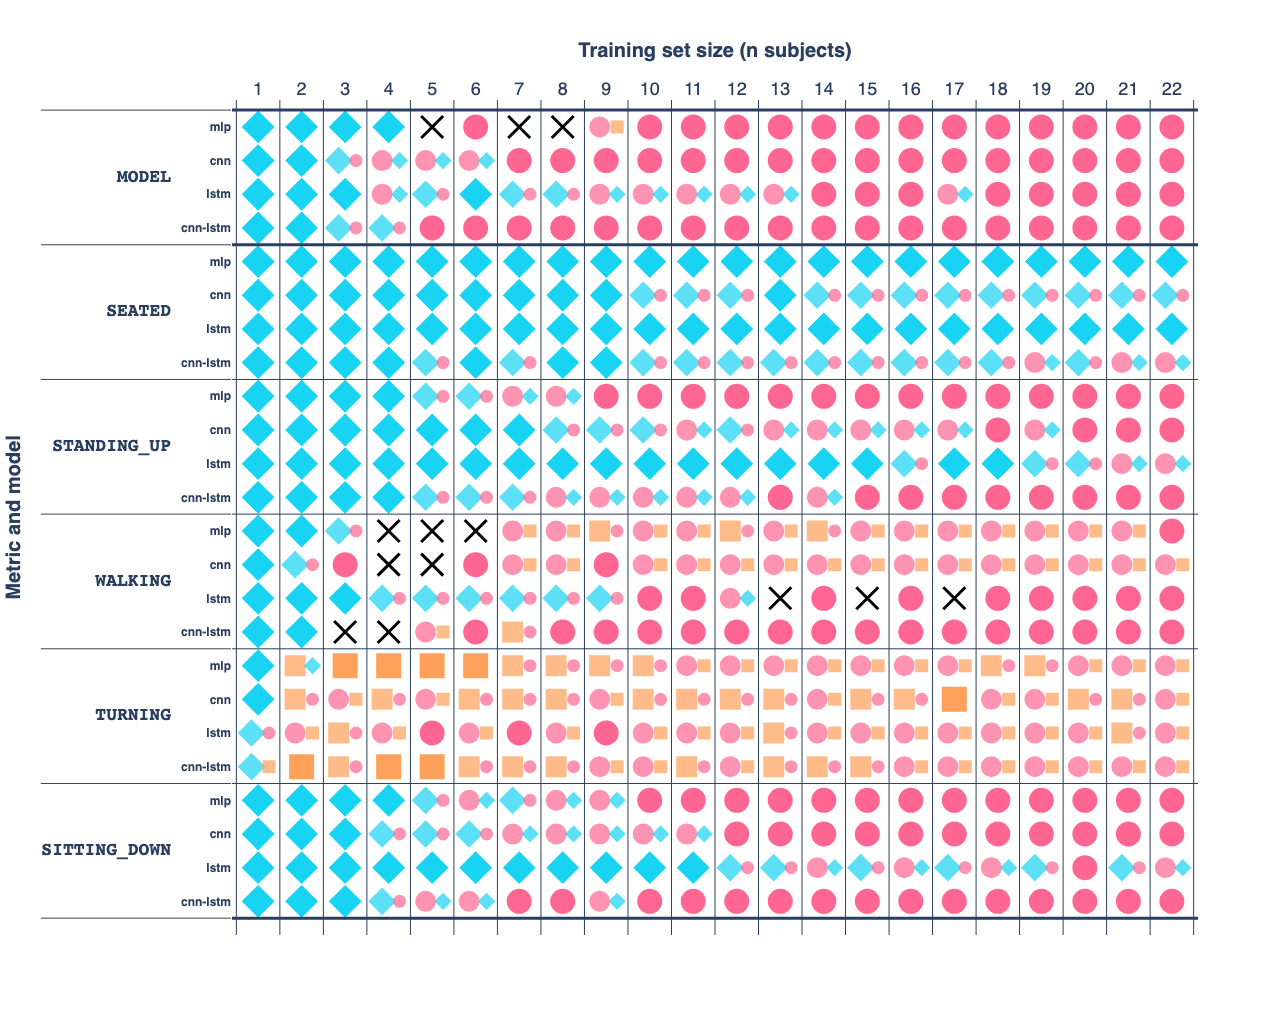

In [14]:
sources_results = {
    TargetFilter.MODEL: datasource_overlall_tests, 
    TargetFilter.SEATED: datasource_seated_tests, 
    TargetFilter.STANDING_UP: datasource_standing_tests, 
    TargetFilter.WALKING: datasource_walking_tests, 
    TargetFilter.TURNING: datasource_turning_tests, 
    TargetFilter.SITTING_DOWN: datasource_sitting_tests
}

best_sources = obtain_best_items(sources_results, SOURCES, MODELS)
significance_sources = load_best_significant(SIGNIFICANCE_FILE)

best_datasources_fig = plot_visual_comparison(best_sources, significance_sources, SOURCES, MODELS, yaxis_conf={'title': 'model', 'range': [24, -0.8]})
best_datasources_fig

In [15]:
best_datasources_fig.write_image(RESULTS_DIR.format('02_best-datasources.pdf'))

## Summary

The obtained results show that the **smartwatch**-trained models have the best overall accuracy and activities F1-score across all models with low amounts of data. On the other side, models trained with the **fused** dataset present the best overall accuracy results with higher amounts of data.

When focusing on individual activities, the **smartwatch**-trained models are the best to recognize the `SEATED` activity. The **smartwatch**-trained models are also the best for the `STANDING_UP` activity with low and medium amounts of data, while with higher amounts the **fused**-trained models show better results. In the `WALKING` activity, the **fused**-trained models obtain the best results across all models, while the **smartphone**-trained models dataset joins them in the MLP and CNN models. Similarly, the models trained with the **smartphone** and the **fused** datasets are the best in the `TURNING` activity. For the `SITTING_DOWN` activity, the **smartwatch**-trained models are good with a low quantity of data while the **fused**-trained models are the best with medium and higher quantities. It is worth noting that the patterns observed in the `STANDING_UP` and `SITTING_DOWN` activities are very similar, which can be explained due to the inverse nature of these movements.

While the models trained with the **fused** dataset usually show the best results, sometimes they are not statistically better than the results obtained with the other datasets. In other words, the fact that the best results are presented by the **fused**-trained models and also by the **smartphone** or **smartwatch** ones implies that the fusion of the data is not always worth it. For example, in the `TURNING` activity, the **smartphone**- and the **fused**-trained models are always the best, which indicates that the fusion of **smartphone** and **smartwatch** data does not improve the **smartphone** results. The same occurs in the `WALKING` activity with the MLP and CNN models. However, the fusion is worth it for the remaining models in that activity and the `STANDING_UP` or `SITTING_DOWN` activities.

Given the obtained results, it is not possible to determine a clear winner. In the end, the most suitable data source will depend on the amount of data that can be collected, the target activities and the selected model. We could determine that the **fused** dataset would be the best option with any model and a moderate amount of data, while the **smartwatch** dataset would be good for the `SEATED` activity and the **smartphone** dataset works fine with the `TURNING` activity. The **smartwatch** dataset would also be the preferred choice for the `STANDING_UP` and `SITTING_DOWN` activities using the LSTM model.